In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
import os

In [2]:
# Define the training and validation base directories
train_dir = 'Training'
validation_dir = 'Validation'
testing_dir = 'Testing'

# Define the subdirectories for each class
classes = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

train_subdirs = [os.path.join(train_dir, cls) for cls in classes]
validation_subdirs = [os.path.join(validation_dir, cls) for cls in classes]
testing_subdirs = [os.path.join(testing_dir, cls) for cls in classes]

In [3]:
# print the image size of random image
from PIL import Image
import random

# Randomly select an image from the training set
random.seed(42)

# Select a random class
cls = random.choice(classes)

# Select a random image from the training set
img_file = random.choice(os.listdir(os.path.join(train_dir, cls)))

# Open the image and print its size
img = Image.open(os.path.join(train_dir, cls, img_file))

# Print the image size
print(img.size)

(224, 224)


In [4]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')
])

# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [5]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "Training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224, 224),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224, 224),
	class_mode='categorical',
  batch_size=126
)

Found 407 images belonging to 7 classes.
Found 55 images belonging to 7 classes.


In [8]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=4, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
4/4 [==============================] - 16s 4s/step - loss: 7.4036 - accuracy: 0.1548 - val_loss: 2.0808 - val_accuracy: 0.1818
Epoch 2/25
4/4 [==============================] - 12s 4s/step - loss: 1.9651 - accuracy: 0.1229
Epoch 3/25
4/4 [==============================] - 11s 2s/step - loss: 1.9359 - accuracy: 0.1474
Epoch 4/25
4/4 [==============================] - 11s 3s/step - loss: 1.9100 - accuracy: 0.2064
Epoch 5/25
4/4 [==============================] - 11s 2s/step - loss: 1.8665 - accuracy: 0.2383
Epoch 6/25
4/4 [==============================] - 11s 2s/step - loss: 1.8668 - accuracy: 0.2211
Epoch 7/25
4/4 [==============================] - 11s 2s/step - loss: 1.8284 - accuracy: 0.2678
Epoch 8/25
4/4 [==============================] - 11s 3s/step - loss: 1.8470 - accuracy: 0.2531
Epoch 9/25
4/4 [==============================] - 12s 2s/step - loss: 1.8469 - accuracy: 0.2260
Epoch 10/25
4/4 [==============================] - 13s 3s/step - loss: 1.7680 - accuracy: 0.33

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

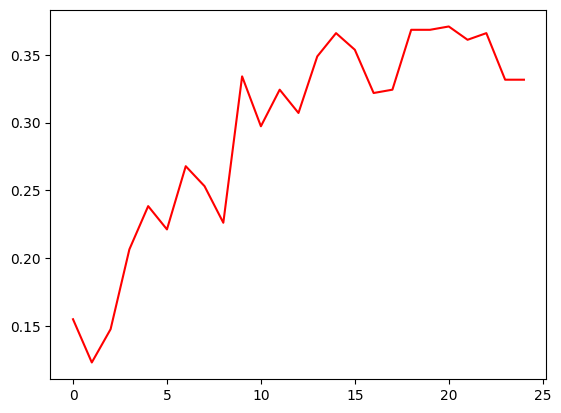

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()